In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("data/Real-Data/Real_combine.csv")
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

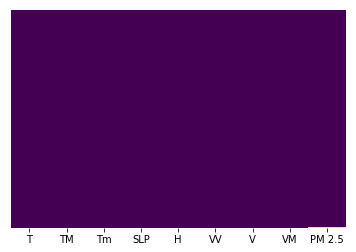

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#checking the null value in datasets

In [5]:
df=df.dropna()

In [6]:
x=df.iloc[:,:-1]#independent features
y=df.iloc[:,-1]#dependent features

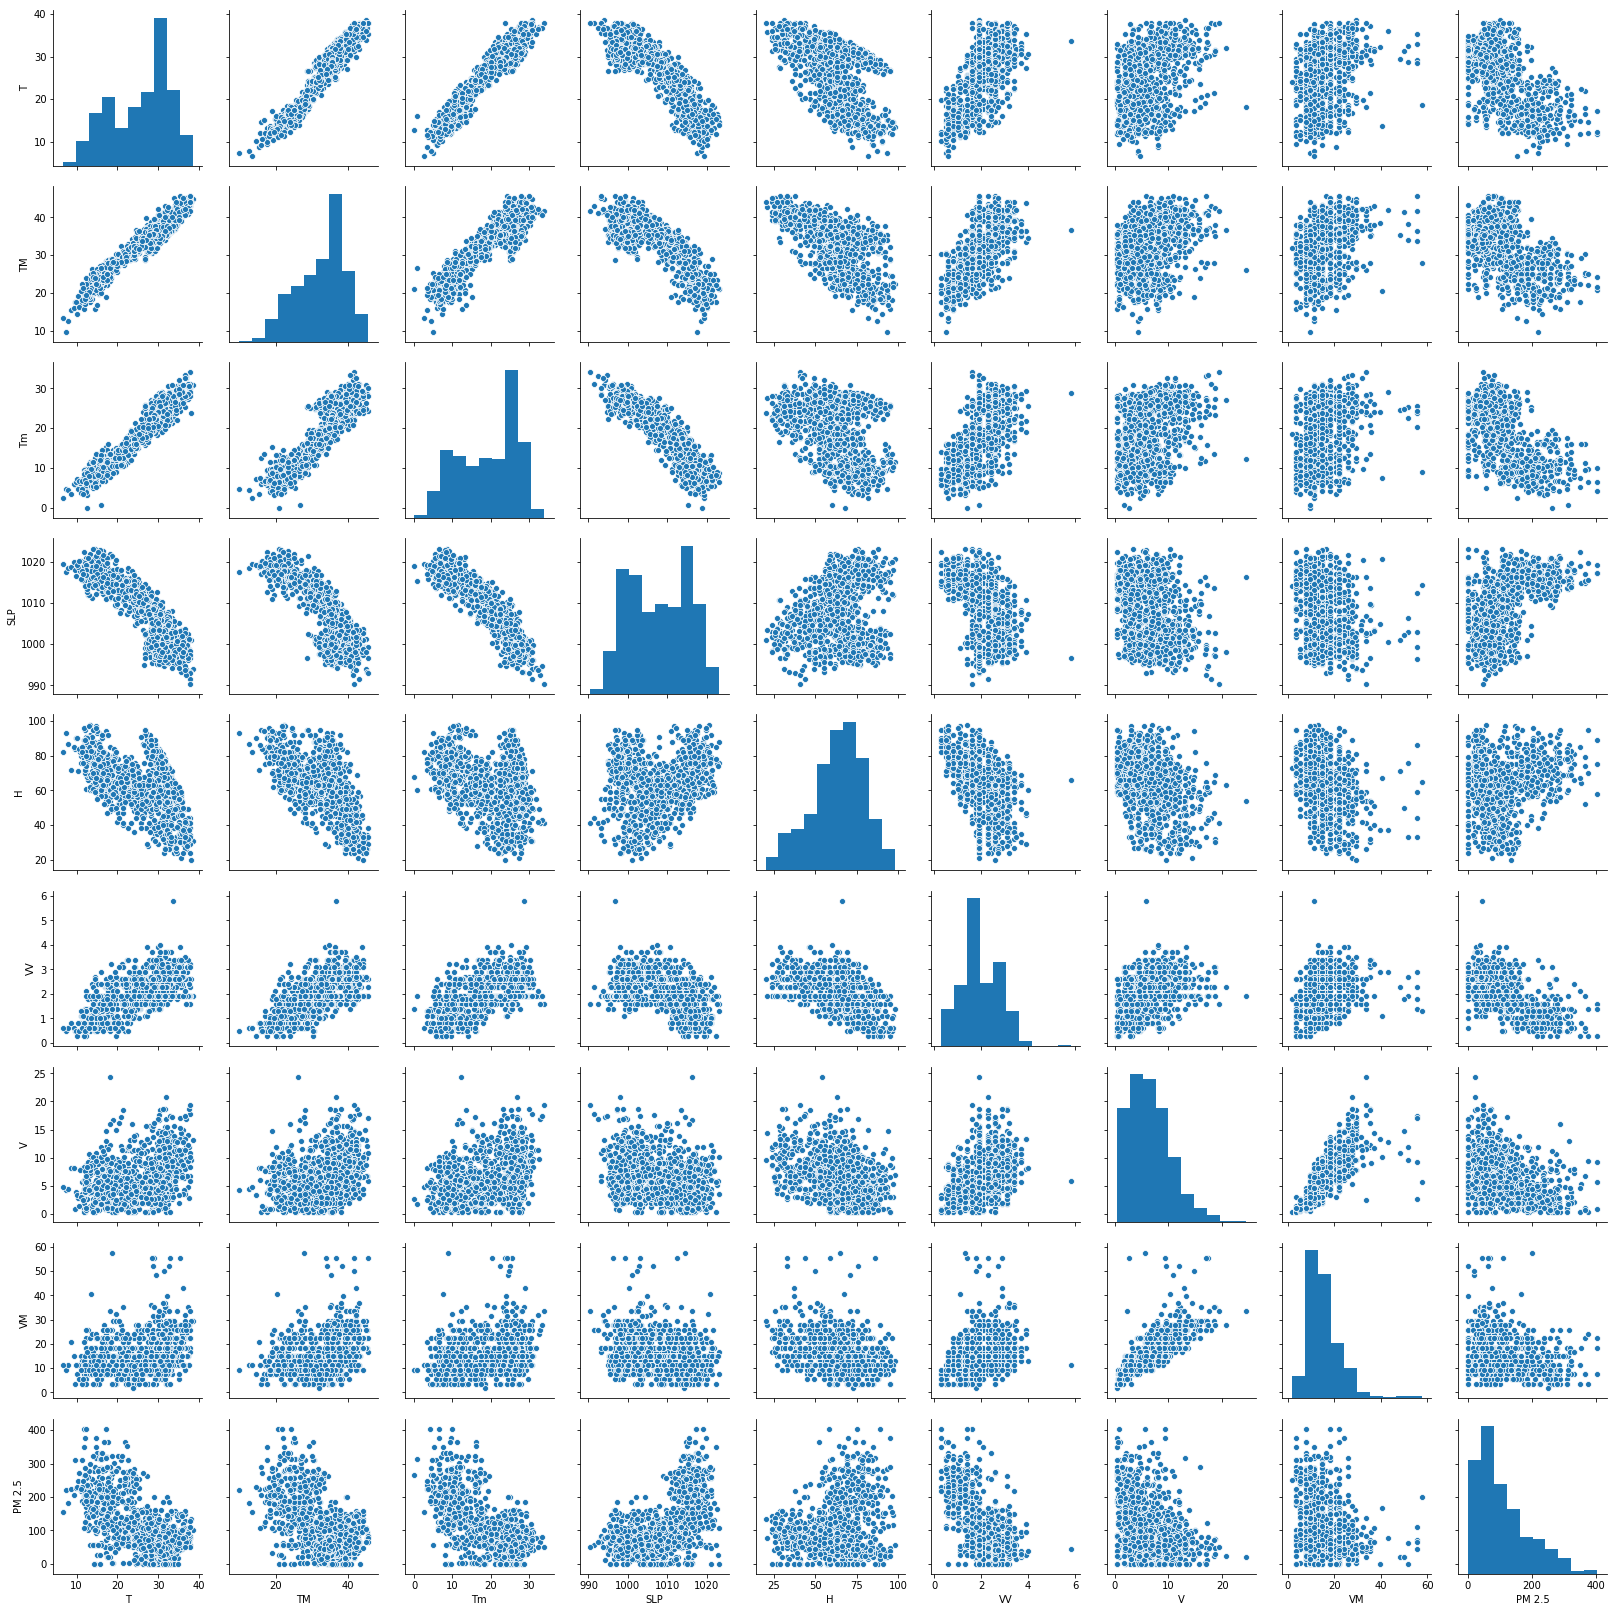

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.963416  0.957227 -0.883207 -0.488919  0.625547  0.320218   
TM      0.963416  1.000000  0.889979 -0.826008 -0.576799  0.598727  0.303218   
Tm      0.957227  0.889979  1.000000 -0.912333 -0.275047  0.547490  0.312165   
SLP    -0.883207 -0.826008 -0.912333  1.000000  0.231971 -0.483494 -0.325862   
H      -0.488919 -0.576799 -0.275047  0.231971  1.000000 -0.489597 -0.356241   
VV      0.625547  0.598727  0.547490 -0.483494 -0.489597  1.000000  0.369851   
V       0.320218  0.303218  0.312165 -0.325862 -0.356241  0.369851  1.000000   
VM      0.276548  0.285671  0.244408 -0.269129 -0.368694  0.325963  0.780952   
PM 2.5 -0.629693 -0.565459 -0.661733  0.605637  0.166577 -0.593327 -0.327917   

              VM    PM 2.5  
T       0.276548 -0.629693  
TM      0.285671 -0.565459  
Tm      0.244408 -0.661733  
SLP    -0.269129  0.605637  
H      -0.368694  0.166577  
VV      0.325963 -0.593327  
V       0.780952 -0.327917  
VM      1.000000 -0.262848  
PM 2.5 -0.262848  1.000000

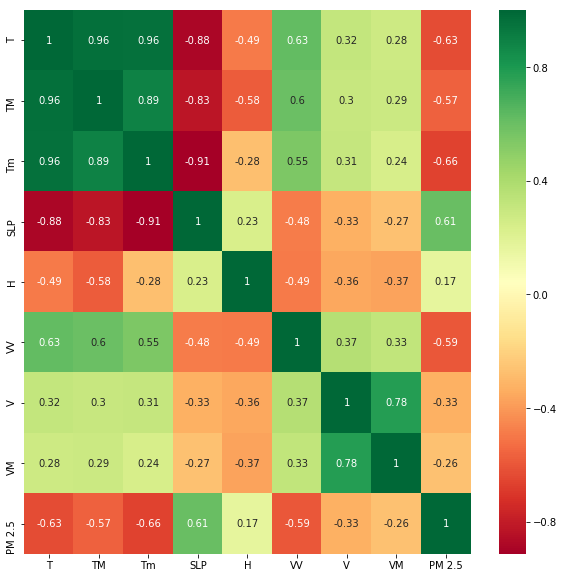

In [9]:
#get correlations of each features in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.17203973 0.11634991 0.20515591 0.10839744 0.08343172 0.21039094
 0.063852   0.04038236]


In [13]:
x.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

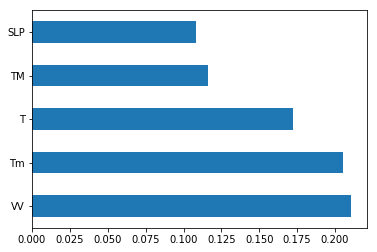

In [52]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

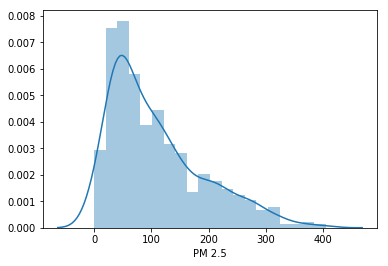

In [15]:
sns.distplot(y)

Train test split

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
print("coefficient of determination R^2 <-- on train set:{}".format(regressor.score(x_train,y_train)))

coefficient of determination R^2 <-- on train set:0.5558460401426302


In [57]:
print("coefficient of determination R^2 <-- on test set:{}".format(regressor.score(x_train,y_train)))

coefficient of determination R^2 <-- on test set:0.5558460401426302


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)
score.mean()

0.4962057187240264

In [59]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,scoring='neg_mean_squared_error',cv=5)#mean square error
mean_mse=np.mean(mse)
print(mean_mse)

-3363.347735049972


# #Model evaluation

In [60]:
coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['coefficient'])
coeff_df

coefficient
T       0.735866
TM      0.494222
Tm     -5.785464
SLP     0.530084
H      -0.734590
VV    -43.457359
V      -1.929977
VM      0.089839

Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.690 in AQI PM2.5 .
Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 0.46 in AQI PM 2.5 .

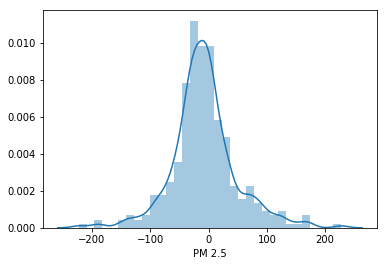

In [61]:
prediction=regressor.predict(x_test)
sns.distplot(y_test-prediction)

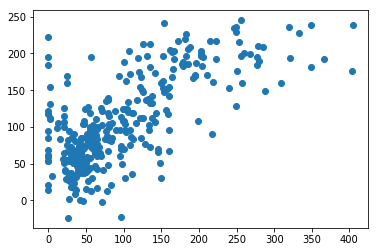

In [62]:
plt.scatter(y_test,prediction)

In [63]:
from sklearn import metrics

In [64]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.542465311325195
MSE: 3226.014432469145
RMSE: 56.79801433561868


In [65]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

# Ridge Regrassion

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
# ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,8,10,20,30,80]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

In [39]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 80}
-3315.6113495473705


# Lasso Regression

In [41]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [44]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-2,1,5,8,10,12,20,30,80]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

{'alpha': 5}
-3318.6485062272786


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
prediction=lasso_regressor.predict(x_test)

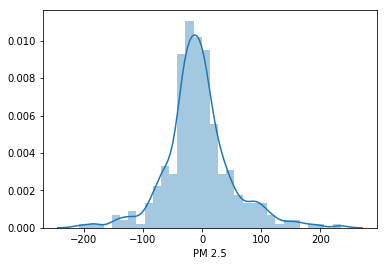

In [47]:
sns.distplot(y_test-prediction)

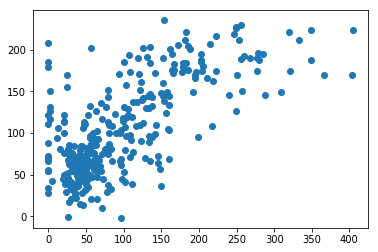

In [48]:
plt.scatter(y_test,prediction)

In [49]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 40.520189245309886
MSE: 3264.5684287721583
RMSE: 57.13640195857767


In [50]:
import pickle
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)

# Decision Tree Regression

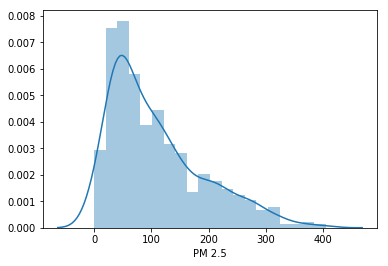

In [66]:
sns.distplot(y)

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
dtree=DecisionTreeRegressor(criterion='mse')

In [72]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [73]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(x_train,y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [74]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(x_test,y_test)))

Coefficient of determination R^2 <-- on test set: 0.19664528013295246


In [76]:
score=cross_val_score(dtree,x,y,cv=5)
score.mean()

0.041384520506413704

In [78]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [80]:
features=list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [81]:
import os
os.environ['PATH']= os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [82]:
dot_data =StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.806096 to fit



In [83]:
prediction=dtree.predict(x_test)

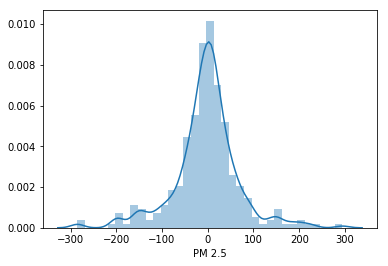

In [84]:
sns.distplot(y_test-prediction)

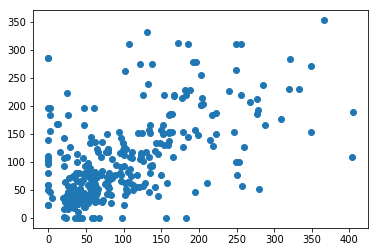

In [85]:
plt.scatter(y_test,prediction)